# Task 2: Image quantization

Quantization is a lossy compression technique achieved by compressing a range of values to a single quantum value. Color quantization reduces the number of colors used in an image; this is important for displaying images on devices that support a limited number of colors and for efficiently compressing certain kinds of images.

The clustering algorithms are frequently applied for image quantization. In this task, you have to load the <code>flower.jpg</code> image from [load_sample_image](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_image.html) of [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets).



In [19]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image

In [20]:
#Import Image
flower = load_sample_image('flower.jpg')   
flower.dtype                              
flower.shape          

(427, 640, 3)

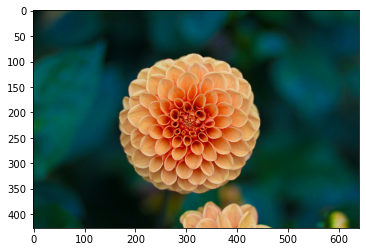

In [21]:
#Check Image
plt.imshow(flower);

In [22]:
#Transform Image to an Array
flower = np.array(flower, dtype=np.float64)/255
print(flower)

[[[0.00784314 0.0745098  0.05098039]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.30196078 0.25098039]
  [0.         0.29803922 0.25098039]
  [0.         0.29411765 0.24705882]]

 [[0.00392157 0.07058824 0.04705882]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.         0.29803922 0.25098039]
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.25490196]]

 [[0.00784314 0.06666667 0.04705882]
  [0.02352941 0.0745098  0.04705882]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.2627451 ]
  [0.00392157 0.29019608 0.2627451 ]]

 ...

 [[0.         0.18039216 0.15686275]
  [0.00392157 0.18823529 0.15686275]
  [0.00392157 0.18431373 0.14509804]
  ...
  [0.01960784 0.17254902 0.10196078]
  [0.02352941 0.16862745 0.10196078]
  [0.02745098 0.17254902 0.10588235]]

 [[0.         0.18431373 0.16078431]
  [0.00392157 0.18823529 0.15686275]


In [23]:
# Transform Data to a 2D numpy array.
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

print(image_array)

[[0.00784314 0.0745098  0.05098039]
 [0.01176471 0.07058824 0.05098039]
 [0.02745098 0.07843137 0.05098039]
 ...
 [0.02745098 0.18039216 0.10980392]
 [0.03137255 0.17647059 0.10980392]
 [0.03529412 0.16862745 0.10588235]]


In [24]:
#Train and Fitting the model 

kmeans8 = KMeans(n_clusters=8, random_state=0).fit(image_array)

In [25]:
# Get labels for all points

labels = kmeans8.predict(image_array)
print (labels)

[7 7 7 ... 7 7 7]


In [26]:
#recreate the array

new_image = kmeans8.cluster_centers_[labels].reshape(w, h, -1)

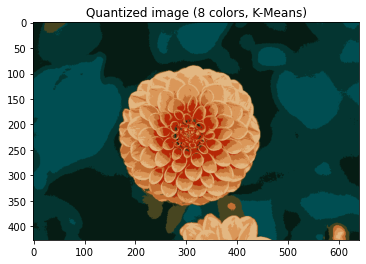

In [27]:
#Print the image
plt.title(f"Quantized image ({8} colors, K-Means)")
plt.imshow(new_image);

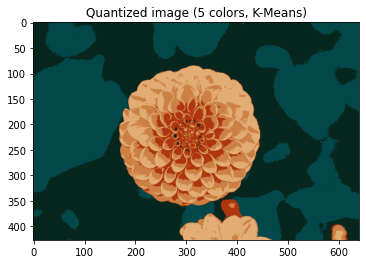

In [28]:
#Using 5 colours
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(image_array)

labels = kmeans5.predict(image_array)

new_image = kmeans5.cluster_centers_[labels].reshape(w, h, -1)

plt.title(f"Quantized image ({5} colors, K-Means)")
plt.imshow(new_image);

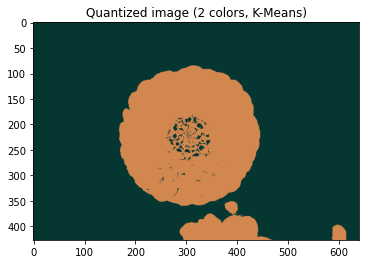

In [29]:
#Using 2 colours
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(image_array)

labels = kmeans2.predict(image_array)

new_image = kmeans2.cluster_centers_[labels].reshape(w, h, -1)

plt.title(f"Quantized image ({2} colors, K-Means)")
plt.imshow(new_image);